In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from xgboost import XGBClassifier

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(300000, 32)

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

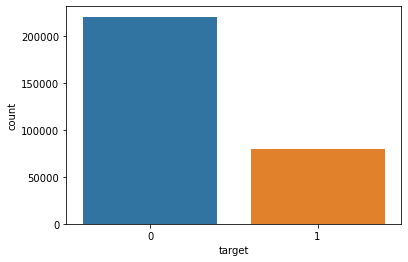

In [5]:
import seaborn as sns
sns.countplot(train['target'])

In [6]:
target = train['target'].values
columns = test.columns[1:]

rf_train_oof = np.zeros(300000,)
rf_test_preds = 0

In [7]:
pd.set_option('display.max_columns', None)

train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [8]:
train.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4',
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
cats = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18']

for cat in cats :
    le = LabelEncoder()
    le.fit(train[cat])
    test[cat] = test[cat].map(lambda s: 'unknown' if s not in le.classes_ else s)
    le.classes_ = np.append(le.classes_, 'unknown')
    train[cat] = le.transform(train[cat])
    test[cat] = le.transform(test[cat])

In [10]:
NUM_FOLDS = 5
auc = []

kf = KFold(n_splits = NUM_FOLDS, shuffle = True, random_state = 2021)

for f, (train_idx, val_idx) in enumerate(kf.split(train, target)) :
    train_x, val_x = train.iloc[train_idx][columns], train.iloc[val_idx][columns]
    train_y, val_y = target[train_idx], target[val_idx]
    
    model = RandomForestClassifier(n_estimators = 500, max_depth = 15, n_jobs = -1, verbose = 3)
    model.fit(train_x, train_y)
    temp_oof = model.predict_proba(val_x)[:, 1]
    temp_test = model.predict_proba(test[columns])[:, 1]
    auc.append(roc_auc_score(val_y, model.predict_proba(val_x)[:, 1])) 
    rf_train_oof[val_idx] = temp_oof
    rf_test_preds += temp_test / NUM_FOLDS


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s


building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500building tree 59 of 500

building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   10.7s



building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500building tree 139 of 500

building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   26.2s


building tree 276 of 500
building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   48.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | 

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s


building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   10.7s


building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500building tree 154 of 500

building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500


[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   26.7s


building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   50.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | 

building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 9 of 500
building tree 10 of 500
building tree 8 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500building tree 15 of 500

building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s



building tree 23 of 500
building tree 24 of 500
building tree 25 of 500building tree 26 of 500

building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 6

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   10.7s


building tree 116 of 500
building tree 117 of 500
building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500


[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   27.5s


building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500building tree 305 of 500

building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   51.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | 

building tree 1 of 500building tree 2 of 500
building tree 3 of 500

building tree 4 of 500
building tree 5 of 500
building tree 6 of 500building tree 7 of 500

building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s


building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   11.5s


building tree 117 of 500
building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500


[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   27.4s


building tree 276 of 500
building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   50.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | 

building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s



building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500building tree 27 of 500

building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500building tree 56 of 500

building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 6

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   10.7s



building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500building tree 151 of 500

building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   26.8s


building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   49.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | 

In [11]:
np.mean(auc) #0.8856527085066057

0.8855446859212162

In [14]:
knn_train_oof = np.zeros(300000,)
knn_test_preds = 0

In [15]:
NUM_FOLDS = 5
auc_knn = []

kf = KFold(n_splits = NUM_FOLDS, shuffle = True, random_state = 2021)

for f, (train_idx, val_idx) in enumerate(kf.split(train, target)) :
    train_x, val_x = train.iloc[train_idx][columns], train.iloc[val_idx][columns]
    train_y, val_y = target[train_idx], target[val_idx]
    
    model = KNeighborsClassifier(n_neighbors = 2, n_jobs = -1)
    model.fit(train_x, train_y)
    temp_oof = model.predict_proba(val_x)[:, 1]
    temp_test = model.predict_proba(test[columns])[:, 1]
    auc_knn.append(roc_auc_score(val_y, model.predict_proba(val_x)[:, 1])) 
    knn_train_oof[val_idx] = temp_oof
    knn_test_preds += temp_test / NUM_FOLDS

In [20]:
np.mean(auc_knn)

0.7572459311822911

In [16]:
lgb_train_oof = np.zeros(300000,)
lgb_test_preds = 0

In [18]:
NUM_FOLDS = 5
lgb_knn = []

kf = KFold(n_splits = NUM_FOLDS, shuffle = True, random_state = 2021)

for f, (train_idx, val_idx) in enumerate(kf.split(train, target)) :
    train_x, val_x = train.iloc[train_idx][columns], train.iloc[val_idx][columns]
    train_y, val_y = target[train_idx], target[val_idx]
    
    model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=2000, 
                          subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, 
                          min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, 
                          random_state=None, n_jobs=- 1, silent=True, importance_type='split')    
    model.fit(train_x, train_y, eval_metric = 'auc')
    temp_oof = model.predict_proba(val_x)[:, 1]
    temp_test = model.predict_proba(test[columns])[:, 1]
    lgb_knn.append(roc_auc_score(val_y, model.predict_proba(val_x)[:, 1])) 
    lgb_train_oof[val_idx] = temp_oof
    lgb_test_preds += temp_test / NUM_FOLDS

In [19]:
np.mean(lgb_knn)

0.8890437787114391

In [21]:
xgb_train_oof = np.zeros(300000,)
xgb_test_preds = 0

In [22]:
NUM_FOLDS = 5
xgb_auc = []

kf = KFold(n_splits = NUM_FOLDS, shuffle = True, random_state = 2021)

for f, (train_idx, val_idx) in enumerate(kf.split(train, target)) :
    train_x, val_x = train.iloc[train_idx][columns], train.iloc[val_idx][columns]
    train_y, val_y = target[train_idx], target[val_idx]
    
    model = XGBClassifier(n_estimators=600, n_jobs=-1, objective='binary:logistic', eval_metric = 'auc', silent = False)
    model.fit(train_x, train_y)
    temp_oof = model.predict_proba(val_x)[:, 1]
    temp_test = model.predict_proba(test[columns])[:, 1]
    xgb_auc.append(roc_auc_score(val_y, model.predict_proba(val_x)[:, 1])) 
    xgb_train_oof[val_idx] = temp_oof
    xgb_test_preds += temp_test / NUM_FOLDS

C:\Users\pooja\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:17:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\pooja\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\pooja\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\pooja\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\pooja\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [23]:
np.mean(xgb_auc)

0.8833121291341038

In [25]:
cat_train_oof = np.zeros(300000,)
cat_test_preds = 0

In [26]:
from catboost import CatBoostClassifier

NUM_FOLDS = 5
cat_auc = []

kf = KFold(n_splits = NUM_FOLDS, shuffle = True, random_state = 2021)

for f, (train_idx, val_idx) in enumerate(kf.split(train, target)) :
    train_x, val_x = train.iloc[train_idx][columns], train.iloc[val_idx][columns]
    train_y, val_y = target[train_idx], target[val_idx]
    
    model = CatBoostClassifier(iterations=500, eval_metric = 'AUC' )
    model.fit(train_x, train_y, verbose = True)
    temp_oof = model.predict_proba(val_x)[:, 1]
    temp_test = model.predict_proba(test[columns])[:, 1]
    cat_auc.append(roc_auc_score(val_y, model.predict_proba(val_x)[:, 1])) 
    cat_train_oof[val_idx] = temp_oof
    cat_test_preds += temp_test / NUM_FOLDS

Learning rate set to 0.201989
0:	total: 24.2ms	remaining: 12.1s
1:	total: 49.4ms	remaining: 12.3s
2:	total: 71.3ms	remaining: 11.8s
3:	total: 94.5ms	remaining: 11.7s
4:	total: 117ms	remaining: 11.6s
5:	total: 141ms	remaining: 11.6s
6:	total: 164ms	remaining: 11.6s
7:	total: 189ms	remaining: 11.6s
8:	total: 213ms	remaining: 11.6s
9:	total: 237ms	remaining: 11.6s
10:	total: 260ms	remaining: 11.6s
11:	total: 283ms	remaining: 11.5s
12:	total: 304ms	remaining: 11.4s
13:	total: 327ms	remaining: 11.3s
14:	total: 351ms	remaining: 11.3s
15:	total: 375ms	remaining: 11.3s
16:	total: 398ms	remaining: 11.3s
17:	total: 421ms	remaining: 11.3s
18:	total: 445ms	remaining: 11.3s
19:	total: 472ms	remaining: 11.3s
20:	total: 499ms	remaining: 11.4s
21:	total: 523ms	remaining: 11.4s
22:	total: 549ms	remaining: 11.4s
23:	total: 577ms	remaining: 11.4s
24:	total: 603ms	remaining: 11.5s
25:	total: 629ms	remaining: 11.5s
26:	total: 655ms	remaining: 11.5s
27:	total: 679ms	remaining: 11.5s
28:	total: 703ms	remaini

241:	total: 6.2s	remaining: 6.61s
242:	total: 6.23s	remaining: 6.59s
243:	total: 6.25s	remaining: 6.56s
244:	total: 6.28s	remaining: 6.54s
245:	total: 6.3s	remaining: 6.51s
246:	total: 6.33s	remaining: 6.48s
247:	total: 6.35s	remaining: 6.46s
248:	total: 6.38s	remaining: 6.43s
249:	total: 6.4s	remaining: 6.4s
250:	total: 6.43s	remaining: 6.38s
251:	total: 6.45s	remaining: 6.35s
252:	total: 6.47s	remaining: 6.32s
253:	total: 6.5s	remaining: 6.29s
254:	total: 6.52s	remaining: 6.26s
255:	total: 6.54s	remaining: 6.24s
256:	total: 6.56s	remaining: 6.21s
257:	total: 6.59s	remaining: 6.18s
258:	total: 6.61s	remaining: 6.15s
259:	total: 6.64s	remaining: 6.13s
260:	total: 6.66s	remaining: 6.1s
261:	total: 6.68s	remaining: 6.07s
262:	total: 6.7s	remaining: 6.04s
263:	total: 6.73s	remaining: 6.01s
264:	total: 6.75s	remaining: 5.99s
265:	total: 6.78s	remaining: 5.96s
266:	total: 6.8s	remaining: 5.93s
267:	total: 6.83s	remaining: 5.91s
268:	total: 6.85s	remaining: 5.88s
269:	total: 6.88s	remaining:

479:	total: 12.2s	remaining: 507ms
480:	total: 12.2s	remaining: 482ms
481:	total: 12.2s	remaining: 456ms
482:	total: 12.2s	remaining: 431ms
483:	total: 12.3s	remaining: 406ms
484:	total: 12.3s	remaining: 380ms
485:	total: 12.3s	remaining: 355ms
486:	total: 12.3s	remaining: 329ms
487:	total: 12.4s	remaining: 304ms
488:	total: 12.4s	remaining: 279ms
489:	total: 12.4s	remaining: 253ms
490:	total: 12.4s	remaining: 228ms
491:	total: 12.5s	remaining: 203ms
492:	total: 12.5s	remaining: 177ms
493:	total: 12.5s	remaining: 152ms
494:	total: 12.5s	remaining: 127ms
495:	total: 12.6s	remaining: 101ms
496:	total: 12.6s	remaining: 75.9ms
497:	total: 12.6s	remaining: 50.6ms
498:	total: 12.6s	remaining: 25.3ms
499:	total: 12.7s	remaining: 0us
Learning rate set to 0.201989
0:	total: 26ms	remaining: 13s
1:	total: 51.5ms	remaining: 12.8s
2:	total: 76ms	remaining: 12.6s
3:	total: 100ms	remaining: 12.4s
4:	total: 127ms	remaining: 12.5s
5:	total: 149ms	remaining: 12.3s
6:	total: 173ms	remaining: 12.2s
7:	tot

220:	total: 5.57s	remaining: 7.04s
221:	total: 5.6s	remaining: 7.01s
222:	total: 5.62s	remaining: 6.98s
223:	total: 5.64s	remaining: 6.95s
224:	total: 5.67s	remaining: 6.93s
225:	total: 5.7s	remaining: 6.91s
226:	total: 5.73s	remaining: 6.89s
227:	total: 5.76s	remaining: 6.87s
228:	total: 5.79s	remaining: 6.85s
229:	total: 5.82s	remaining: 6.83s
230:	total: 5.86s	remaining: 6.82s
231:	total: 5.89s	remaining: 6.8s
232:	total: 5.92s	remaining: 6.78s
233:	total: 5.95s	remaining: 6.76s
234:	total: 5.98s	remaining: 6.74s
235:	total: 6.01s	remaining: 6.72s
236:	total: 6.04s	remaining: 6.7s
237:	total: 6.07s	remaining: 6.68s
238:	total: 6.1s	remaining: 6.66s
239:	total: 6.13s	remaining: 6.64s
240:	total: 6.16s	remaining: 6.62s
241:	total: 6.19s	remaining: 6.6s
242:	total: 6.22s	remaining: 6.58s
243:	total: 6.25s	remaining: 6.56s
244:	total: 6.28s	remaining: 6.54s
245:	total: 6.32s	remaining: 6.52s
246:	total: 6.35s	remaining: 6.5s
247:	total: 6.38s	remaining: 6.48s
248:	total: 6.41s	remaining

458:	total: 12.1s	remaining: 1.08s
459:	total: 12.1s	remaining: 1.05s
460:	total: 12.1s	remaining: 1.03s
461:	total: 12.2s	remaining: 1s
462:	total: 12.2s	remaining: 974ms
463:	total: 12.2s	remaining: 948ms
464:	total: 12.2s	remaining: 921ms
465:	total: 12.3s	remaining: 895ms
466:	total: 12.3s	remaining: 868ms
467:	total: 12.3s	remaining: 842ms
468:	total: 12.3s	remaining: 816ms
469:	total: 12.4s	remaining: 789ms
470:	total: 12.4s	remaining: 763ms
471:	total: 12.4s	remaining: 736ms
472:	total: 12.4s	remaining: 710ms
473:	total: 12.5s	remaining: 684ms
474:	total: 12.5s	remaining: 657ms
475:	total: 12.5s	remaining: 631ms
476:	total: 12.5s	remaining: 604ms
477:	total: 12.6s	remaining: 578ms
478:	total: 12.6s	remaining: 552ms
479:	total: 12.6s	remaining: 525ms
480:	total: 12.6s	remaining: 499ms
481:	total: 12.7s	remaining: 473ms
482:	total: 12.7s	remaining: 446ms
483:	total: 12.7s	remaining: 420ms
484:	total: 12.7s	remaining: 394ms
485:	total: 12.8s	remaining: 367ms
486:	total: 12.8s	remai

202:	total: 4.77s	remaining: 6.98s
203:	total: 4.79s	remaining: 6.95s
204:	total: 4.82s	remaining: 6.93s
205:	total: 4.84s	remaining: 6.91s
206:	total: 4.86s	remaining: 6.89s
207:	total: 4.89s	remaining: 6.86s
208:	total: 4.91s	remaining: 6.84s
209:	total: 4.93s	remaining: 6.81s
210:	total: 4.96s	remaining: 6.79s
211:	total: 4.98s	remaining: 6.77s
212:	total: 5s	remaining: 6.74s
213:	total: 5.03s	remaining: 6.72s
214:	total: 5.05s	remaining: 6.7s
215:	total: 5.07s	remaining: 6.67s
216:	total: 5.09s	remaining: 6.64s
217:	total: 5.12s	remaining: 6.62s
218:	total: 5.14s	remaining: 6.6s
219:	total: 5.17s	remaining: 6.58s
220:	total: 5.19s	remaining: 6.55s
221:	total: 5.21s	remaining: 6.53s
222:	total: 5.24s	remaining: 6.51s
223:	total: 5.27s	remaining: 6.5s
224:	total: 5.3s	remaining: 6.48s
225:	total: 5.32s	remaining: 6.45s
226:	total: 5.35s	remaining: 6.43s
227:	total: 5.37s	remaining: 6.41s
228:	total: 5.39s	remaining: 6.38s
229:	total: 5.42s	remaining: 6.36s
230:	total: 5.44s	remaining

442:	total: 10.5s	remaining: 1.35s
443:	total: 10.5s	remaining: 1.32s
444:	total: 10.5s	remaining: 1.3s
445:	total: 10.5s	remaining: 1.28s
446:	total: 10.6s	remaining: 1.25s
447:	total: 10.6s	remaining: 1.23s
448:	total: 10.6s	remaining: 1.21s
449:	total: 10.6s	remaining: 1.18s
450:	total: 10.7s	remaining: 1.16s
451:	total: 10.7s	remaining: 1.14s
452:	total: 10.7s	remaining: 1.11s
453:	total: 10.7s	remaining: 1.09s
454:	total: 10.8s	remaining: 1.06s
455:	total: 10.8s	remaining: 1.04s
456:	total: 10.8s	remaining: 1.02s
457:	total: 10.8s	remaining: 994ms
458:	total: 10.9s	remaining: 971ms
459:	total: 10.9s	remaining: 947ms
460:	total: 10.9s	remaining: 924ms
461:	total: 10.9s	remaining: 900ms
462:	total: 11s	remaining: 876ms
463:	total: 11s	remaining: 853ms
464:	total: 11s	remaining: 829ms
465:	total: 11s	remaining: 805ms
466:	total: 11.1s	remaining: 782ms
467:	total: 11.1s	remaining: 758ms
468:	total: 11.1s	remaining: 735ms
469:	total: 11.1s	remaining: 711ms
470:	total: 11.2s	remaining: 

188:	total: 4.73s	remaining: 7.78s
189:	total: 4.75s	remaining: 7.76s
190:	total: 4.78s	remaining: 7.73s
191:	total: 4.8s	remaining: 7.7s
192:	total: 4.83s	remaining: 7.68s
193:	total: 4.85s	remaining: 7.65s
194:	total: 4.88s	remaining: 7.63s
195:	total: 4.9s	remaining: 7.6s
196:	total: 4.93s	remaining: 7.58s
197:	total: 4.96s	remaining: 7.56s
198:	total: 4.98s	remaining: 7.54s
199:	total: 5.01s	remaining: 7.51s
200:	total: 5.03s	remaining: 7.48s
201:	total: 5.06s	remaining: 7.46s
202:	total: 5.08s	remaining: 7.44s
203:	total: 5.11s	remaining: 7.41s
204:	total: 5.13s	remaining: 7.38s
205:	total: 5.16s	remaining: 7.36s
206:	total: 5.18s	remaining: 7.33s
207:	total: 5.21s	remaining: 7.31s
208:	total: 5.23s	remaining: 7.28s
209:	total: 5.25s	remaining: 7.26s
210:	total: 5.28s	remaining: 7.23s
211:	total: 5.31s	remaining: 7.21s
212:	total: 5.33s	remaining: 7.18s
213:	total: 5.36s	remaining: 7.16s
214:	total: 5.38s	remaining: 7.13s
215:	total: 5.41s	remaining: 7.11s
216:	total: 5.43s	remain

427:	total: 10.7s	remaining: 1.8s
428:	total: 10.8s	remaining: 1.78s
429:	total: 10.8s	remaining: 1.75s
430:	total: 10.8s	remaining: 1.73s
431:	total: 10.8s	remaining: 1.7s
432:	total: 10.8s	remaining: 1.68s
433:	total: 10.9s	remaining: 1.65s
434:	total: 10.9s	remaining: 1.63s
435:	total: 10.9s	remaining: 1.6s
436:	total: 11s	remaining: 1.58s
437:	total: 11s	remaining: 1.55s
438:	total: 11s	remaining: 1.53s
439:	total: 11s	remaining: 1.5s
440:	total: 11.1s	remaining: 1.48s
441:	total: 11.1s	remaining: 1.46s
442:	total: 11.1s	remaining: 1.43s
443:	total: 11.1s	remaining: 1.41s
444:	total: 11.2s	remaining: 1.38s
445:	total: 11.2s	remaining: 1.35s
446:	total: 11.2s	remaining: 1.33s
447:	total: 11.2s	remaining: 1.3s
448:	total: 11.3s	remaining: 1.28s
449:	total: 11.3s	remaining: 1.25s
450:	total: 11.3s	remaining: 1.23s
451:	total: 11.3s	remaining: 1.2s
452:	total: 11.4s	remaining: 1.18s
453:	total: 11.4s	remaining: 1.15s
454:	total: 11.4s	remaining: 1.13s
455:	total: 11.4s	remaining: 1.1s


171:	total: 5.64s	remaining: 10.8s
172:	total: 5.67s	remaining: 10.7s
173:	total: 5.7s	remaining: 10.7s
174:	total: 5.73s	remaining: 10.6s
175:	total: 5.76s	remaining: 10.6s
176:	total: 5.79s	remaining: 10.6s
177:	total: 5.83s	remaining: 10.5s
178:	total: 5.86s	remaining: 10.5s
179:	total: 5.89s	remaining: 10.5s
180:	total: 5.92s	remaining: 10.4s
181:	total: 5.96s	remaining: 10.4s
182:	total: 5.99s	remaining: 10.4s
183:	total: 6.02s	remaining: 10.3s
184:	total: 6.05s	remaining: 10.3s
185:	total: 6.08s	remaining: 10.3s
186:	total: 6.11s	remaining: 10.2s
187:	total: 6.13s	remaining: 10.2s
188:	total: 6.16s	remaining: 10.1s
189:	total: 6.18s	remaining: 10.1s
190:	total: 6.21s	remaining: 10.1s
191:	total: 6.24s	remaining: 10s
192:	total: 6.26s	remaining: 9.96s
193:	total: 6.29s	remaining: 9.92s
194:	total: 6.32s	remaining: 9.88s
195:	total: 6.34s	remaining: 9.84s
196:	total: 6.37s	remaining: 9.79s
197:	total: 6.4s	remaining: 9.76s
198:	total: 6.43s	remaining: 9.73s
199:	total: 6.47s	remain

409:	total: 12.4s	remaining: 2.73s
410:	total: 12.5s	remaining: 2.7s
411:	total: 12.5s	remaining: 2.67s
412:	total: 12.5s	remaining: 2.64s
413:	total: 12.6s	remaining: 2.61s
414:	total: 12.6s	remaining: 2.58s
415:	total: 12.6s	remaining: 2.55s
416:	total: 12.7s	remaining: 2.52s
417:	total: 12.7s	remaining: 2.49s
418:	total: 12.7s	remaining: 2.46s
419:	total: 12.8s	remaining: 2.43s
420:	total: 12.8s	remaining: 2.4s
421:	total: 12.8s	remaining: 2.37s
422:	total: 12.9s	remaining: 2.34s
423:	total: 12.9s	remaining: 2.31s
424:	total: 12.9s	remaining: 2.28s
425:	total: 12.9s	remaining: 2.25s
426:	total: 13s	remaining: 2.22s
427:	total: 13s	remaining: 2.19s
428:	total: 13s	remaining: 2.15s
429:	total: 13.1s	remaining: 2.12s
430:	total: 13.1s	remaining: 2.09s
431:	total: 13.1s	remaining: 2.06s
432:	total: 13.1s	remaining: 2.03s
433:	total: 13.2s	remaining: 2s
434:	total: 13.2s	remaining: 1.97s
435:	total: 13.2s	remaining: 1.94s
436:	total: 13.3s	remaining: 1.91s
437:	total: 13.3s	remaining: 1.

In [27]:
np.mean(cat_auc)

0.8914135796060526

In [ ]:
# best winning model is catboostclassifier with 0.8914135796060526, second is lgbmclassifier with 0.8890437787114391